## Step 1: Set Up the CommonsenseQA Dataset

Download and prepare the CommonsenseQA dataset
Split the data into train/validation/test sets if not already done
Understand the format (questions, multiple-choice answers)

## Step 2: Set Up Three Models

Randomly Initialized Transformer

Build a transformer architecture from scratch
Initialize weights randomly
This will serve as your baseline


Pretrained Transformer

Use the same transformer architecture as Model 1
Initialize with pretrained weights (e.g., BERT, RoBERTa)
Make sure this model wasn't specifically trained on CommonsenseQA


Large Language Model (1B+ parameters)

Choose an LLM (e.g., GPT-2, LLaMA, OPT, BLOOM)
No finetuning for this model - just prompt engineering



## Step 3: Training/Finetuning

Finetune Models 1 & 2 on CommonsenseQA train set

Use the same hyperparameters for both
Train for multiple epochs
Save checkpoints and track validation performance


For Model 3 (LLM), develop effective prompts instead of finetuning

## Step 4: Prompt Engineering (for LLM)

Design different prompt formats
Test various instruction styles
Try few-shot examples in prompts
Experiment with temperature and other generation parameters

## Step 5: Evaluation

Evaluate all three models on the test set
Calculate accuracy, F1 score, or other relevant metrics
Compare performance across models

## Step 6: Analysis

Analyze which types of questions each model handles well/poorly
Look at error patterns
Discuss why certain approaches work better

## Step 7: Create Presentation

Summarize methodology
Present results with visualizations
Include discussion of findings
Provide limitations and potential improvements

Technical Requirements:

Programming language: Python recommended
Libraries: PyTorch/TensorFlow, Transformers (Hugging Face), etc.
Computational resources: You'll need GPU access for training

.

.

.

TODO: Checkpointing, Early stopping works?, Log to Wandb, sweeps or other auto tool (optional), llm

**Delete steps generated by Claude later**

.

.

.

# **FS25 NLP Project 1: Word Embeddings/Recurrent Neural Networks**

Fabian Dubach

# **Introduction**

<style>
  .container {
    display: flex;
    align-items: flex-start;
    gap: 20px; /* spacing between text and ASCII art */
    font-family: monospace;
  }
  .text {
    flex: 2;
  }
  .ascii {
    white-space: pre;
    font-size: 4.5px;
    line-height: 1.2;
    flex: 1;
  }
</style>

<div class="container">
  <div class="text">
    <p>The task for my project was to perform common sense question answering using the CommonsenseQA dataset.</p><br>
    <p>I evaluated the performance of three different Transformer-based models:</p>
    <p>1. A randomly initialized Transformer</p>
    <p>2. A pretrained Transformer (with the same architecture as the first Transformer)</p>
    <p>3. A large language model (LLM) with over 1 billion parameters</p><br>
    <p>While the first two models were finetuned on the dataset using the same hyperparameters for a fair comparison, the LLM was evaluated through prompt engineering without additional training. This setup allowed me to explore how different levels of pretraining and model scale impact common sense reasoning performance.</p>
    <p>We had to also track the trainings with Wandb (workspace URL: <a href="https://wandb.ai/fabian-dubach-hochschule-luzern/CommonsenseQA/workspace?nw=nwuserfabiandubach" target="_blank">https://wandb.ai/fabian-dubach-hochschule-luzern/CommonsenseQA/workspace?nw=nwuserfabiandubach</a>).</p>
  </div>

  <div class="ascii">
<pre>
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣶⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠀⠀⠀⠀⠀⣤⣤⣤⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠀⣠⡶⢿⡇⢿⣿⡏⢳⣦⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⡛⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣧⣼⣿⣴⣋⡽⠮⠿⢭⣟⣏⣷⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣧⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡼⣇⣿⡿⠶⣶⣿⣟⡛⣷⣿⢠⠙⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⡈⣏⠇⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡟⢹⠁⣿⠋⠉⢹⠉⠙⣿⡇⣾⣀⣾⠀⢀⣤⡀⢀⡀⠀⠀⢀⣠⣴⣾⠛⢻⡛⢻⡄⢀⣳⡀⢀⣠⠄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣷⣾⢀⣿⡇⠀⠸⠀⠀⣿⣧⡽⠿⣟⣺⣭⠴⢿⡏⣩⣷⡾⢛⣭⣴⣿⣇⠘⣿⣷⣿⡛⠉⢻⣟⣷⠄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠿⢿⣟⣿⣿⡦⣶⣪⡭⠿⣚⣫⣭⣽⣶⡄⠀⢸⡇⣿⡙⣿⣿⣿⣿⣿⣿⣆⠹⣿⣿⣷⡀⠀⢿⡉⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⣀⣤⣶⣿⠿⠛⣉⣭⣶⣾⣿⠿⠟⠛⠉⠉⢻⠀⢸⣷⣿⣇⢻⡿⣿⣿⣿⣿⠟⠀⠹⣿⣿⠃⠀⠘⣷⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣤⣦⣼⣿⠿⠛⣋⡁⣼⢠⣿⡿⠛⠉⠁⠀⠀⢀⡀⢀⣴⣾⠀⢸⣿⡇⢻⡄⠙⠿⠻⠛⠁⠀⢀⣠⣽⣿⣇⡀⠀⠸⣧⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⠿⣛⣭⣴⡾⠟⠛⣧⣿⢸⡿⠀⠀⠀⠀⣰⣿⣿⣷⣾⣿⣿⠀⢸⡏⣇⢸⣷⡀⠀⢀⣠⣴⣾⠿⠛⣿⢻⣿⣹⡀⠀⢻⣆⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⡟⣦⠀⠀⠀⢀⡿⣵⡿⠛⠉⣡⣶⣤⣄⣿⣯⢸⣇⠀⠀⢠⣾⣿⡿⣿⣿⣿⣿⡿⠀⢸⡇⢻⡼⣿⣷⣶⠿⠛⠉⠀⠀⠀⠸⡇⣿⣿⣧⠀⠘⣿⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⢹⠀⢀⣠⣼⣿⣿⠀⢀⣼⣿⣿⣿⣿⡇⣿⢸⣿⣀⣀⣿⡿⠿⠶⠚⠛⠉⠉⠀⠀⢸⡇⠀⢻⣾⣝⣿⡆⠀⢀⣠⡴⠖⠛⢻⡾⣿⣿⣆⠀⢹⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣇⣼⡾⠟⠋⣿⢻⣇⣤⣌⠻⢿⣿⣿⣿⠃⢿⠀⠉⠉⠁⠀⠀⠀⣀⣤⡤⠶⠶⠒⠚⣻⣷⣄⠈⣿⣿⣿⣿⡞⠉⠀⠀⠀⠀⠀⣿⢿⣿⣾⣋⣽⠇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣹⠏⠀⠀⠀⣿⢿⣿⣿⣯⡴⠾⠛⢋⣡⠶⠛⠛⠋⣉⣉⣉⣙⢻⣿⠀⠀⠀⠀⠀⢠⡟⠀⠈⠻⢦⣈⣿⣿⣧⠀⠀⢀⣠⣴⡾⢿⣿⣿⣿⣿⣿⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⡟⣿⡟⠀⠀⠀⣿⠈⠋⠉⢀⣠⠴⣛⣩⣤⣶⣞⣭⣿⢿⣿⣿⣻⣼⣿⣆⣀⣤⣤⣴⣿⣄⣠⣶⣦⣀⣙⣿⣿⣿⡶⣿⠟⠋⣁⣶⠟⢻⣽⣿⣿⣿⠇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⢠⣿⣇⠀⠀⠀⢹⣠⡴⠖⢻⣷⢫⣿⣿⣿⣯⣿⣟⣿⣿⣭⣽⣿⡿⣿⣿⣿⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⠋⠉⣿⠀⢸⣿⣿⣿⣿⣷⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣼⣿⣿⣤⣴⣾⢿⡅⠀⣀⣾⢿⣿⣿⣿⣿⣿⣿⡿⣿⣷⣿⣿⣿⡇⣿⣿⡇⠀⠀⢸⣿⣿⡟⢿⣿⣿⣿⣿⣿⣣⣿⠁⣿⣀⣤⡿⠀⢀⣿⣿⣿⣿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⠻⣿⠛⠉⠀⠈⣿⠛⢽⣿⢻⣿⣿⢿⣿⣿⣿⡇⣿⠿⣶⣶⣚⣧⣿⣿⡇⠀⠀⣸⣿⣿⣿⣄⣈⢿⣿⢿⣷⣿⣿⠀⠉⠉⠀⠀⠀⠘⡇⣿⣿⣿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡇⡀⣷⡆⠀⠀⠀⠸⣧⣻⣿⢸⣿⣿⡿⢿⣾⣻⡇⣿⣿⣿⣿⣿⣿⣿⠿⠷⠾⠛⠛⠿⢿⣿⣿⣿⣄⣿⠿⠋⢸⣿⠀⠀⠀⠀⠀⠀⠀⡇⣿⣿⣿⣿⣿⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣷⡇⣿⡇⠀⠀⠀⠀⣿⣿⣿⡾⢿⣿⣿⣿⣿⡶⠷⠾⠛⠛⠉⠁⢀⣠⠤⠴⠒⡆⢠⠀⢰⡉⠻⣿⣽⡏⠀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⡇⣿⡿⣿⣿⣿⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣧⣿⠿⢀⣀⣤⣴⣿⣿⣿⡷⠾⠛⠋⠉⢀⣀⣠⠤⠴⠒⠻⡆⢸⠀⠀⢀⡠⠇⠸⡄⠈⣇⠀⠈⡻⢦⡀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⡇⣿⣧⡘⠿⢻⡆
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣆⣿⣿⣿⣿⣿⡿⠛⣉⣀⡀⣠⠴⠒⠋⠉⠁⠀⠀⠀⠀⠀⡇⢸⣠⠴⣫⡄⠀⠀⡇⠀⢹⠀⠀⣿⠦⢿⡀⢸⡇⠀⠀⣀⣤⣤⣿⠀⡇⣿⣿⣿⣆⢸⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⢿⡟⣽⣿⠀⣏⠁⠀⡇⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣇⠀⡖⣻⠋⠀⠀⠈⢻⠀⢈⡇⠀⠸⡄⠘⣧⢸⡇⠀⢸⣷⣾⣿⠏⠀⡇⣿⣿⣿⣿⢸⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⠏⠛⠋⢡⣿⠀⠸⣿⣟⡃⣇⠀⠀⠀⠀⠀⣀⣠⡤⠶⠒⠋⠀⠛⠁⠀⣀⣤⣶⣿⣿⣿⣿⣷⣤⡈⠁⢻⡞⣿⠀⠈⠻⣴⠏⠀⠀⠿⢹⣿⣎⢻⣿⡇
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⡟⠀⠀⢀⡿⣿⠀⠀⠈⠳⡇⠻⠤⠶⠚⠋⠉⠁⠀⠀⠀⠀⠀⣀⣤⣶⣿⣿⣿⣿⣿⠿⠛⠻⣿⣿⣿⣷⣜⣷⣿⠀⠀⢀⣀⣤⣤⣶⣾⣶⣿⣿⠃⢸⡇
⠀⠀⠀⠀⠀⠀⣀⣤⡶⠶⠖⠚⢛⠛⠳⢶⣼⡟⠀⠀⢀⣼⣹⣿⢀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⢀⣀⣠⡤⢤⣾⣿⣿⣿⡿⠿⠛⠉⠹⡇⠀⠀⣿⣿⣟⢿⣿⣿⠹⣶⣿⡿⠛⠻⣏⠀⠉⠉⡛⣿⡿⣾⡇
⠀⠀⠀⢀⣴⠞⠋⢰⡇⢰⣿⢻⢻⢻⢶⣦⠙⣷⡀⠀⣸⢧⠟⢿⣿⣿⣿⣷⣶⣶⣤⣴⣲⡾⠿⠟⠒⠒⠛⡇⠙⣿⠉⠀⢧⠀⠀⠀⠀⣧⠀⠀⢸⣿⣿⡎⣿⠁⢀⣼⣏⢀⣠⣤⣸⣶⠀⠀⣿⣿⣿⠛⠁
⠀⠀⠀⣾⠃⠀⣠⡬⣤⣼⣛⠾⣼⣞⡾⡟⠀⠘⣧⣠⣏⡞⠀⠈⠻⣿⡏⢹⡟⠛⠻⣿⠁⠀⠀⠀⠀⠀⠀⣇⠀⣿⠀⠀⢸⡄⠀⠀⠀⢸⠀⠀⠘⣿⣿⣇⣿⣴⡞⢣⣽⣿⣿⣿⣿⣿⠀⠀⣿⣿⡟⠀⠀
⠀⠀⠀⣿⡶⣿⣿⣸⣿⣿⣿⠿⠷⠾⢽⣅⡲⠶⢻⣿⣼⢁⣠⣤⣶⣿⣿⠘⡇⠀⠀⢻⡆⠀⠀⠀⠀⠀⢀⣸⡀⢹⡇⠀⠈⡇⠀⠀⠀⠈⡇⠀⠀⢿⣿⣿⢹⣿⣤⣿⣿⣿⣿⡿⢿⣟⡀⠀⣿⣿⡇⠀⠀
⠀⠀⠀⠈⠛⠿⢯⣜⣿⠏⠀⠀⠀⢀⡿⣨⣿⣶⣤⣿⣷⣯⣿⣿⣿⣿⣿⠀⡇⠀⠀⠐⡿⣦⣰⣒⣶⣿⣿⣿⣷⣾⣇⠀⠀⢻⠀⠀⠀⠀⢷⠀⠀⢸⣿⣿⣾⣿⣸⣿⡏⢠⠟⣠⣿⣿⣿⣦⡈⢹⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢸⡟⣾⠄⠀⠀⣸⡇⣿⣿⣿⠟⠋⠛⢿⣿⣿⣿⣿⣿⡄⢻⠀⠀⠀⡇⠈⠙⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⢸⡆⠀⠀⠀⢸⡄⠀⠀⣿⣿⣇⣿⠛⠛⠻⣿⣺⣿⣿⣿⣿⣿⣿⡿⠃⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣼⢧⡇⠀⠀⠀⣿⢸⣿⣿⡿⢦⣴⣿⣿⣷⡿⣿⡿⣿⡇⢸⡄⠀⠀⢹⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⡆⠀⠀⣇⠀⠀⠀⠀⣇⠀⠀⢸⣿⣟⢿⡀⠀⠀⠈⠉⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣿⣨⡧⠤⠤⢤⣇⡾⣿⣿⣠⣿⣿⣿⣿⣿⣿⣽⣿⣿⣷⠀⣇⠀⠀⢸⠀⠀⢸⢻⣿⣿⣿⣿⡇⣿⣿⠀⠀⢹⡄⠀⠀⢀⣸⠀⠀⠸⣿⣿⣼⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢀⡿⣧⣤⠶⠦⣼⣿⣿⣿⡏⠈⣿⣿⢿⣿⣿⣿⣏⠉⢹⣿⡀⢻⠀⠀⠘⡇⠀⠸⡄⠙⢿⣿⣿⠇⣿⣿⡄⠀⠈⠓⠒⠋⠉⠀⠀⠀⠀⢿⠹⣯⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⣸⣿⢃⡏⠀⠀⢻⣿⣿⣽⣿⣦⠘⣿⣿⣿⣿⣿⢻⣿⣾⣿⡇⠘⡇⠀⠀⣇⠀⠀⣇⠀⠀⠙⢿⡇⣿⢸⣧⠀⠀⠀⠀⡴⠒⢶⠀⠀⠀⠘⣆⠀⢻⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡿⡅⣸⢁⣄⡄⣾⣿⢿⣿⠿⣿⣿⢻⣿⣿⣟⣿⣸⣻⡿⣿⣧⠀⠙⠒⠛⠛⠀⠀⢿⣿⣄⠀⠀⠀⣿⠈⣿⡄⠀⠀⠀⡇⠀⠘⡇⠀⠀⠀⢿⣦⢸⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢸⣧⡇⣿⣼⣿⠃⣿⣿⣾⣿⣷⣤⡿⠿⢿⣿⣿⣇⣿⡟⠋⠀⣿⡀⠀⣴⠲⡆⠀⠀⠸⣿⣿⣦⠀⠀⢸⡀⢹⣧⠀⠀⠀⣇⠀⠀⢹⠀⠀⠀⠸⣿⡟⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢽⡿⣷⠏⠛⠿⢠⣿⣿⣿⣿⢿⣯⡇⠀⠀⠈⠁⠀⠀⠀⠀⠀⢸⣇⠀⢻⠀⢳⠀⠀⠀⣿⣿⣿⣷⣾⢸⡇⠈⣿⡀⠀⠀⢸⠀⠀⠈⡇⠀⠀⢀⣿⣿⣷⣀⣀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠘⣧⡙⣀⣀⣀⣸⣿⣽⣿⣿⠀⠈⠙⣶⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡀⢸⡀⠸⡄⠀⠀⢻⣿⣿⣿⣿⡼⡇⠀⢘⣧⣤⡴⠾⠷⠶⠖⠛⠛⢛⠋⠉⢿⢹⠉⣭⡿⠿⠷⠶⢦⡄⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠹⣟⣁⣸⣿⣿⣧⡿⠿⣿⣀⡀⠀⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣇⣈⣧⣘⣷⣤⣤⣼⠿⠿⣿⣿⣧⣧⡀⣸⢹⡏⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⢸⢸⡄⡿⠖⠚⠉⡉⠓⢿⡀⠀⠀⠀⠀
⠀⠀⠀⠀⣠⡴⣾⠋⠉⢙⣻⣷⠛⠛⠳⠶⠶⠽⠿⠃⠀⠀⠀⠀⠀⣀⡤⣼⡿⠋⠉⠁⠀⠀⣠⠀⣿⣿⠀⠀⠀⠀⠈⠉⠻⣿⢸⣷⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠸⡏⡇⣿⠀⠀⠀⢻⣷⢸⡇⠀⠀⠀⠀
⠀⠀⠀⠀⡟⠀⡟⠀⠀⢸⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⡥⢺⠏⡆⠀⠀⠀⠀⠀⡏⠀⡟⡇⠀⠀⠀⠀⠀⠀⢀⡇⢸⣿⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⡇⡇⢿⠀⠀⠀⢸⣿⡌⣷⠀⠀⠀⠀
⠀⠀⠀⢸⠇⢠⡇⠀⠀⢰⣿⣯⣏⣻⡆⠀⠀⠀⠀⠀⠀⠀⠀⣸⠃⢀⡿⢸⡇⠀⠀⠀⠀⢠⡇⠀⡇⡇⠀⠀⠀⠀⠀⠀⢸⡇⢸⣿⡆⠀⠀⠀⠀⠀⠀⠀⣧⠀⠀⡇⢿⢸⠀⠀⠀⠈⣿⡇⢹⡀⠀⠀⠀
⠀⠀⠀⡟⡄⣼⠀⠀⢀⣿⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⢸⡇⣸⡇⠀⠀⠀⠀⢸⠁⢸⣷⡇⠀⠀⠀⠀⠀⠀⢸⡇⢸⣿⡇⠀⠀⠀⠀⠀⠀⠀⢻⠀⠀⢹⢸⣼⡀⠀⣀⣀⣿⣧⣸⡇⠀⠀⠀
⠀⠀⢰⢧⣇⡏⠀⠀⣸⣿⠿⢭⣿⣿⡏⠀⠀⠀⠀⠀⠀⠀⢰⡏⠀⣿⠀⣿⡇⠀⠀⠀⠀⢸⠀⢸⢸⠁⠀⠀⠀⠀⠀⠀⢸⡇⢸⣿⣿⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⢸⢸⣿⡏⢉⣁⣤⣤⣄⢈⡇⠀⠀⠀
⠀⠀⣼⢼⣿⠃⠀⠀⣿⣿⠀⢸⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⢸⡇⢠⡿⢰⣿⠃⠀⠀⠀⠀⣼⠀⢸⢸⠀⠀⠀⠀⠀⠀⠀⢸⡇⢸⢹⣸⣦⣤⣤⣤⣶⣶⣶⡿⠀⠀⢸⡄⡇⣧⣽⣿⣿⣿⡽⠟⠁⠀⠀⠀
⠀⠀⢿⢻⡏⠀⠀⢰⣿⣿⣟⠛⢿⣿⡇⠀⠀⠀⠀⠀⠀⠀⢸⠗⣻⡇⢸⢹⣆⣀⣀⣀⣤⡏⠀⢸⢸⠀⠀⠀⠀⠀⠀⠀⢸⡇⢸⠈⠉⠉⠉⠉⠉⠉⠀⠀⠀⠀⠀⠈⡇⣿⠘⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠛⠤⢤⣤⣘⢺⣿⣿⣿⣿⡿⠃⠀⠀⠀⠀⠀⠀⠀⠸⢧⣿⠃⠘⠓⠛⠛⠛⠋⠉⠁⠀⢼⢸⠀⢰⡾⠿⠛⠛⠿⢿⡇⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⢸⠀⠙⣿⣿⣿⠀⠀⠀⠀⠀⠀
⠀⠀⢘⣶⡶⠚⠿⢿⣿⣩⢿⢿⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣸⠀⢸⡇⠀⠀⠀⠀⣿⡇⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢷⢸⡀⠀⠈⠁⢸⡇⠀⠀⠀⠀⠀
⠀⠀⣼⣹⠃⠀⢰⣷⢻⠁⠈⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡟⣹⠀⢸⠃⠀⠀⠀⠀⣿⠇⠜⠀⣤⠶⠖⠛⠛⠋⠉⠉⢩⣿⡇⠀⢸⠸⡇⠀⠀⠀⠘⡇⠀⠀⠀⠀⠀
⠀⢠⡟⠏⠀⠀⣾⣿⣼⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⡇⠀⢀⣴⠶⠞⠛⠛⣻⣷⠀⡏⣿⠀⢸⢀⣴⣷⣦⡀⣿⠇⡇⠀⡟⠀⣀⣀⣀⣀⣀⣀⣸⣿⡇⠀⢸⡆⡇⠀⠀⠀⠀⣷⠀⠀⠀⠀⠀
⠀⣸⠇⠀⠀⢸⣿⡇⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⣾⣀⣀⣤⣤⣶⣿⡿⠀⡇⣿⠀⢸⣿⣿⣿⣫⣾⣿⠀⡇⢠⣟⣿⣿⣿⡿⠿⠿⠿⠿⠁⡇⠀⠈⡇⣷⢀⡀⠀⠀⢻⠀⠀⠀⠀⠀
⠀⣿⡼⠀⠀⡟⣿⣷⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⠀⢀⡟⡿⠿⠟⠛⠛⣃⡇⠀⡇⣿⠀⢸⣿⣿⣿⣿⣿⣿⡄⡇⢸⡇⠀⠀⠀⠀⠀⠀⠀⢰⣶⡇⠀⠀⣇⢹⣾⣿⠀⣰⢾⡆⠀⠀⠀⠀
⢠⣿⡇⠀⢸⣷⣿⣹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⠀⢸⡇⠀⠀⠀⠀⢰⣿⡇⠀⡇⣿⠀⣾⣿⣿⣿⣿⣿⣿⡃⡇⢸⣧⣤⣤⣴⣶⣶⣶⣶⣾⣿⡇⠀⠀⢿⢸⣿⣿⣾⣿⣸⡇⠀⠀⠀⠀
⢸⢭⠥⠦⣬⣽⣧⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⣿⠀⢸⢵⣶⣾⣿⣿⣿⡿⡇⠀⡇⣿⠀⣿⣿⣿⣿⣿⣿⣿⡇⡇⢸⡏⠿⠟⠛⠛⠛⠛⠛⠛⣧⣷⠀⠀⢸⠀⣿⣿⣿⣿⠛⣇⠀⠀⠀⠀
⢸⣸⠁⢠⣿⣿⣹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⢸⠉⠉⠉⠁⠀⢠⣾⡇⠀⡇⣿⠀⣿⣿⣿⣿⣿⣿⣿⠇⡇⢸⡇⠀⣀⣀⣀⣀⣀⣀⣰⣿⣿⠀⠀⠸⠀⣿⣿⣿⣵⡇⣿⠀⠀⠀⠀
⠘⣧⣰⠞⣞⣷⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⢸⣀⣀⣠⣤⣤⣼⣿⡇⠀⡇⣿⠀⢈⣭⣭⠭⠽⠭⣿⡇⡇⢸⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡀⠀⠀⠀⢻⣟⣾⣿⣿⢻⠀⠀⠀⠀
⠀⠈⠛⠛⠛⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⣿⠿⠿⠿⠿⠟⢛⣻⡇⠀⡇⢻⠀⢸⠁⠀⠀⠀⠀⣿⡇⡇⠸⡏⠉⠀⠀⠀⠀⠀⠀⠀⣼⣿⡇⠀⠀⠀⢸⣿⣿⣿⣿⢸⡆⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣇⠀⣿⣀⣤⣤⣤⣤⣼⣿⡇⠀⡇⢸⠀⢸⠀⣠⣶⣄⠀⣿⡇⣇⠀⡇⣴⣶⣶⣾⣿⣿⣿⣿⣿⣿⣇⣀⣂⠀⢸⣿⣿⣿⣿⣿⡇⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⡿⠴⠿⠿⠿⠿⠿⠿⠿⠿⠷⣦⡄⢸⠀⢸⣾⣿⣿⢟⣴⣿⣷⣼⠶⠗⠛⠛⠛⠛⠛⠛⠛⠋⠉⠉⠉⢉⡟⣧⠈⣿⣿⣿⣿⡿⣧⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣿⠟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣿⡇⢸⣴⢾⣿⡿⣻⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⠀⣿⣿⣿⣿⣿⣿⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣾⠟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⣿⡇⢸⣿⢸⣿⣿⣿⣿⣿⣿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⣿⣿⡀⣿⣿⣿⣿⣿⣿⡄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⡇⢸⣿⢸⣿⣿⣿⣿⣿⠃⠀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣿⣿⣿⡇⢸⣿⣿⣿⣿⢻⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣷⣶⣶⣶⣶⣶⣶⣶⡶⠶⠦⠤⣾⣿⣿⣿⣿⣷⢘⣿⢸⣿⣿⣿⣿⡏⣭⠭⠭⠭⠤⠤⠤⠴⠶⠶⠶⠶⠶⠶⠶⠱⣌⢻⣿⣧⢸⣿⣿⣿⣿⣾⣇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⡾⠟⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⣉⣽⣿⣾⣿⣿⣿⣿⣿⠀⣿⢸⣿⣿⣿⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⣿⡞⣿⢻⠈⣿⣿⣿⣿⣿⣿⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣶⠟⠋⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣴⣾⣿⣿⣿⣿⣿⣿⣿⠛⢹⠀⣿⣾⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⣿⣿⢻⣿⡀⣿⣿⣿⣿⣿⣿⡄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣾⣿⣀⣤⣄⣤⣤⣄⣀⣀⣀⣀⣶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣅⢸⠀⣿⡿⣿⣿⣤⣤⣤⡤⠤⠤⠶⠶⠶⠖⠒⠒⠒⠚⠛⠛⠛⠺⣿⣿⣿⡇⠹⡇⣿⣿⣿⣿⣿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣸⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⣿⣿⣿⡟⠉⢹⣿⣿⣿⣿⡿⠿⡾⠀⣿⡇⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⠰⠇⣿⣿⣿⣿⡿⣿⡇⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡟⠛⠉⠁⠀⠀⠀⠙⠛⠉⠁⠀⠀⠁⠀⣛⣁⣿⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⠟⣹⡇⢀⣙⣿⣯⡷⠿⠛⠁⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠉⠉⠉⠉⠉⠉⠹⠷⣦⣤⣤⣤⣤⣤⣤⣤⣤⣤⣶⣶⣶⡶⠶⠶⠶⠶⠾⠿⠛⠛⠋⠉⠉⠁⠀⠀
</pre>
  </div>
</div>

# **Setup**

Import all libraries needed

In [2]:
import os
import gc
import random
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from transformers import (
    BertConfig,
    BertForMultipleChoice,
    BertTokenizer,
    AutoTokenizer,
    AutoModelForCausalLM,
    get_linear_schedule_with_warmup,
    GenerationConfig,
)
from datasets import load_dataset
from tqdm import tqdm
import wandb

Setup random seed function to ensure reproducibility.

_Info about the seed value: The field of natural language processing began in the 1940s, after World War II. At this time, people recognized the importance of translation from one language to another and hoped to create a machine that could do this sort of translation automatically. → Seed value is mostly set to 42_

In [3]:
SEED = 1940

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In the next step I import and split the dataset. For the split I take off the last 1000 entries from the train-split and use it as validation, the rest of this is of course used for the training. Then I use the validation-part as the test, since the real test-split has no answer keys.

In [4]:
train = load_dataset("tau/commonsense_qa", split="train[:-1000]")
valid = load_dataset("tau/commonsense_qa", split="train[-1000:]")
test = load_dataset("tau/commonsense_qa", split="validation")

print(len(train), len(valid), len(test))

8741 1000 1221


Login for the experiment tracking.

In [5]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: fabian-dubach (fabian-dubach-hochschule-luzern) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# **Data Exploration**

In [ ]:
print("\033[4m" + "Dataset Features" + "\033[0m")
for feature in train.features:
    print(feature)
print("\n" + "\033[4m" + "Example" + "\033[0m")
for feature in train.features:
    print(feature + ":", train[2][str(feature)])

# **Preprocessing**

### BERT

During the preprocessing phase of my NLP project, I carefully considered several common text-cleaning and preparation techniques. Below is a breakdown of each step, whether I used it, and the reasoning behind my decision.

1. **Tokenization**  
   ✅ *Used*  
   I used the `BertTokenizer` from Hugging Face to tokenize all text inputs. This tokenizer breaks text into subword units and adds special tokens, ensuring compatibility with the BERT model architecture.

2. **Lowercasing, Stemming, Lemmatizing, Stopword/Punctuation Removal**  
   ❌ *Not used*  
   These steps are common in traditional NLP pipelines but not necessary when using a pre-trained transformer like BERT. I specifically used the `'bert-base-cased'` model, which is sensitive to letter casing. Applying lowercasing or stripping punctuation could disrupt the model's understanding of context. Similarly, stemming or lemmatizing would interfere with subword tokenization, which already handles morphological variations effectively.

3. **Removal of Unknown/Other Words**  
   ❌ *Not explicitly used*  
   Instead of manually removing unknown words, I relied on the tokenizer to handle them. Words not in the vocabulary are broken into subword tokens or mapped to the `[UNK]` token if completely unrecognized. BERT is designed to handle such cases gracefully.

4. **Format Cleaning (e.g., HTML-extracted text)**  
   ✅ *Used when necessary*  
   While my dataset (CommonsenseQA) was fairly clean, I included basic text normalization steps to remove potential noise (e.g., HTML entities) as a precaution in other stages of the pipeline.

5. **Truncation**  
   ✅ *Used*  
   To fit input sequences into BERT's maximum input size constraint, I applied truncation during tokenization. This ensures that long question-choice pairs are trimmed to 128 tokens, which balances performance and memory usage.

6. **Feature Selection**  
   ✅ *Used implicitly*  
   Rather than traditional feature engineering, I relied on the tokenized outputs (`input_ids`, `attention_mask`, `token_type_ids`) generated by the tokenizer. These features are optimized for transformer models and encapsulate the essential linguistic structure needed for training.

By tailoring preprocessing to suit BERT’s architecture, I avoided redundant or harmful steps while retaining the ones critical for accurate and efficient model performance.

---

The BertTokenizer is a class from the Hugging Face `transformers` library that handles the conversion of raw text into tokens that BERT can understand. Specifically, it tokenizes the input text into subword tokens (e.g., "playing" becomes ["play", "##ing"]). This subword tokenization allows the model to process both common and out-of-vocabulary words more effectively. The `from_pretrained('bert-base-cased')` method loads a pre-trained tokenizer that corresponds to the BERT model. The `'bert-base-cased'` model refers to a base-sized BERT model (with 12 layers and 768 hidden units) that has been trained on cased text, meaning it differentiates between uppercase and lowercase letters which is important for distinguishing meaning in proper nouns or acronyms (e.g., “US” vs “us”).

**Why I use BertTokenizer:** I use the BertTokenizer to ensure that the text is processed in the exact way BERT was originally trained. 

**The tokenizer will:** 
- Split the text into subword tokens. 
- Add special tokens such as `[CLS]` and `[SEP]` that BERT requires. 
- Handle padding and truncation to ensure the input is the correct length for the model.

I use the following line of code to initialize the BERT tokenizer.

In [6]:
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-cased')

c:\Users\fabia\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


The `preprocess_commonsenseqa` function is designed to preprocess the CommonsenseQA dataset for input into a BERT-based model. The goal is to tokenize the questions and their corresponding multiple-choice answers into a format compatible with BERT, and then convert the correct answer's label into a numerical value.

1. **Extracting Questions and Choices:** The function starts by extracting the questions and their multiple-choice options from the `examples` object.

2. **Initialize Data Structures:** It then initializes empty lists to hold the tokenized inputs, attention masks, and token type IDs (used for differentiating between sentence pairs in models like BERT).

3. **Convert Answer Labels to Indices:** The answer choices are labeled with letters (A, B, C, D, E), but the model requires numerical labels. This step converts the letters into indices (A → 0, B → 1, etc.).

4. **Processing Each Question-Choice Pair:** For each question and its corresponding choices: Each choice is paired with the question. Both the question and the choice are tokenized using the BERT tokenizer (`tokenizer_bert`), which converts the text into `input_ids`, `attention_mask` and `token_type_ids` tensors that BERT can understand.

5. **Stacking Tokens for Each Choice:** After tokenizing each choice for a question, the function stacks the resulting tensors (for all choices) into single tensors for input to the model.

6. **Returning Tokenized Data:** Finally, the function returns a dictionary containing the tokenized inputs (`input_ids`, `attention_mask` and `token_type_ids`) along with the numerical labels corresponding to the correct answers.

In [7]:
def preprocess_commonsenseqa(examples):

    questions = [q for q in examples['question']]
    
    all_input_ids = []
    all_attention_mask = []
    all_token_type_ids = []
    
    answerkeys = examples['answerKey']
    labels = []
    
    for key in answerkeys:
        labels.append(ord(key) - ord('A'))
    
    for i, (question, choices) in enumerate(zip(questions, examples['choices'])):
        inputs = []

        for choice in choices['text']:
            text_a = question
            text_b = choice
            
            encoded = tokenizer_bert(
                text_a, text_b,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            
            inputs.append({
                'input_ids': encoded['input_ids'],
                'attention_mask': encoded['attention_mask'],
                'token_type_ids': encoded['token_type_ids']
            })
        
        input_ids = torch.cat([x['input_ids'] for x in inputs])
        attention_mask = torch.cat([x['attention_mask'] for x in inputs])
        token_type_ids = torch.cat([x['token_type_ids'] for x in inputs])
        
        all_input_ids.append(input_ids)
        all_attention_mask.append(attention_mask)
        all_token_type_ids.append(token_type_ids)

    return {
        'input_ids': all_input_ids,
        'attention_mask': all_attention_mask,
        'token_type_ids': all_token_type_ids,
        'labels': labels
    }

Next, I apply the preprocessing to the datasets.

In [8]:
train_dataset = preprocess_commonsenseqa(train)
validation_dataset = preprocess_commonsenseqa(valid)
test_dataset = preprocess_commonsenseqa(test)

After preprocessing the CommonsenseQA dataset into tokenized inputs and labels, I convert the data into PyTorch `TensorDataset` objects. I do this because this groups all of the input tensors, so they can be iterated over together. It seamlessly integrates with PyTorch’s `DataLoader` for tasks like batching, shuffling and parallel data loading, ensuring that the data pipeline runs efficiently. Additionally, it provides synchronized indexing, ensuring that each input tensor corresponds correctly to its label, making the dataset ready for model training and evaluation.

In [9]:
train_features = TensorDataset(
    torch.stack(train_dataset['input_ids']),
    torch.stack(train_dataset['attention_mask']),
    torch.stack(train_dataset['token_type_ids']),
    torch.tensor(train_dataset['labels'])
)

val_features = TensorDataset(
    torch.stack(validation_dataset['input_ids']),
    torch.stack(validation_dataset['attention_mask']),
    torch.stack(validation_dataset['token_type_ids']),
    torch.tensor(validation_dataset['labels'])
)

test_features = TensorDataset(
    torch.stack(test_dataset['input_ids']),
    torch.stack(test_dataset['attention_mask']),
    torch.stack(test_dataset['token_type_ids']),
    torch.tensor(test_dataset['labels'])
)

### DeepSeek

For tokenizing my LLM I used the AutoTokenizer from Hugging Face to load the tokenizer for the DeepSeek-V2-Lite model. This tokenizer is specifically designed to be compatible with the DeepSeek model architecture. Since DeepSeek is a large language model (LLM), it expects input in a specific tokenized format, including proper handling of special tokens, padding and prompt formatting. By using the `AutoTokenizer` and loading the tokenizer directly from the model’s Hugging Face repository, I ensure that the text is processed exactly as the model was trained on.

The `trust_remote_code=True` argument is necessary because DeepSeek uses custom model/tokenizer code not yet fully integrated into the standard Transformers library. This option allows the tokenizer to load correctly and function as intended.

In short, I use this tokenizer to guarantee consistency between my input prompts and the expectations of the DeepSeek model, which is crucial for generating accurate and meaningful responses.

In [ ]:
tokenizer_deepseek = AutoTokenizer.from_pretrained('deepseek-ai/DeepSeek-V2-Lite', trust_remote_code=True)

# **Model**

To see the number of parameters for my models a bit better, I first implemented a function which adds an apostrophe after every three digits.

In [ ]:
def format_number(num):
    return f"{num:,}".replace(",", "'")

### BERT

For the random initialized and the pretrained transformer architechture, I used BERT (Bidirectional Encoder Representations from Transformers) with a classification head specifically designed for multiple-choice inputs called `BertForMultipleChoice`. I used the Hugging Face checkpoint `bert-base-cased`, which is a pretrained transformer model developed by Google with **108'311'041 parameters**. This variant is trained on large English corpora (BooksCorpus and English Wikipedia) and maintains case sensitivity.

BERT is well-suited for classification tasks like CommonsenseQA due to its deep bidirectional attention, which helps capture the nuanced relationships between the question and each answer option. The pretrained bert-base-cased weights provide strong language understanding out of the box, significantly improving performance over training from scratch.

The BERT model is composed of an embedding layer, encoder, pooling layer, dropout layer and of course a classifier:

1. **Embedding Layer (`BertEmbeddings`):**
- Word Embeddings: `Embedding(28996, 768)` → Maps each token to a 768-dimensional vector. The vocabulary size is 28,996 tokens.
- Position Embeddings: `Embedding(512, 768)` → Adds position information to each token, allowing the model to distinguish word order up to 512 tokens.
- Token Type Embeddings: `Embedding(2, 768)` → Distinguishes between sentence pairs (e.g., question vs. answer).
- Layer Normalization + Dropout: Normalizes embeddings and applies dropout (`p=0.1`) for regularization.

2. **Encoder (`BertEncoder`):**
- 12 Transformer Layers (stacked) → Each layer includes:
    - Multi-Head Self-Attention (BertSelfAttention)
        - Projects inputs into queries, keys and values using linear layers.
        - Attention mechanism allows each token to attend to all others.
        - Output passed through a linear layer, then dropout + layer norm.
    - Feed-Forward Network
        - First Linear: `768 → 3072`
        - GELU activation
        - Second Linear: `3072 → 768`
        - Followed by LayerNorm and Dropout.
- Each of these layers processes the tokenized question-choice pair, allowing the model to capture deep contextual relationships.

3. **Pooling Layer (`BertPooler`):**
- Extracts the `[CLS]` token output from the final encoder layer.
- Applies a linear layer + `tanh` activation to produce a fixed-size sentence representation.

4. **Dropout Layer:**
- Applied before classification to reduce overfitting (`p=0.1`).

5. **Classifier (`Linear(768 → 1)`):**
- For each choice, outputs a single logit.
- During training/evaluation, logits for all choices are grouped and passed through softmax to compute the predicted answer.

---

In the following code block I load the configuration of the `'bert-base-cased'` model, but without the model weights. I just load the architecture details like number of layers, hidden size and so on. After I create a `BertForMultipleChoice` model using that configuration. This model is randomly initialized, meaining it hasn't learned anything yet.

In [10]:
config_bert = BertConfig.from_pretrained('bert-base-cased')
random_bert_model = BertForMultipleChoice(config_bert)

Next, I calculate and print the total number of parameters of the `random_bert_model` and then print its architecture.

In [ ]:
print(f"Number of parameters: {format_number(sum(p.numel() for p in random_bert_model.parameters()))}\n")
print(random_bert_model)

In the next cell I create a `BertForMultipleChoice` model with already pretrained weights. These pretrained weights allow my model to already understand some word meanings, grammar and general language patterns. This helps the model perform better and converge faster when fine-tuned on my specific downstream task, such as multiple-choice question answering with CommonsenseQA.

In [11]:
pretrained_bert_model = BertForMultipleChoice.from_pretrained('bert-base-cased')

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


I calculate and print the total number of parameters of the `pretrained_bert_model` and then print its architecture.

In [ ]:
print(f"Number of parameters: {format_number(sum(p.numel() for p in pretrained_bert_model.parameters()))}\n")
print(pretrained_bert_model)

### DeepSeek

The DeepSeek-V2-Lite is a cutting-edge decoder-only transformer model optimized for causal language modeling, so for generating or completing text. With **15'706'484'224 parameters**, it is orders of magnitude larger than BERT and is specifically designed for autoregressive generation tasks.

For the DeepSeek-V2-Lite model, the architecture is composed of an embedding layer, a stack of decoder layers (transformer blocks), normalization layers and a final language modeling head for token prediction:

1. **Token Embedding Layer:**
- `Embedding(102400, 2048)` → Maps tokens from a very large vocabulary (102,400 tokens) to 2048-dimensional embeddings.

2. **Stack of 27 Decoder Layers (`DeepseekV2DecoderLayer`):**
- Each decoder layer includes:
    - Self-Attention Mechanism (`DeepseekV2Attention`)
        - Query projection: `Linear(2048 → 3072)`
        - KV projections:
            - `kv_a_proj_with_mqa`: `Linear(2048 → 576)` — Multi-query attention (MQA), a memory-efficient variant.
            - `kv_b_proj`: `Linear(512 → 4096)` — Advanced attention processing.
        - RMSNorm on KV inputs: Normalizes activations to improve stability.
        - Rotary Embeddings (`DeepseekV2YarnRotaryEmbedding`) → Positional encoding mechanism that enables extrapolation to longer sequences.
        - Output projection: `Linear(2048 → 2048)`
    - Feed-Forward Layer
        - Layer 0 uses:
            - Standard MLP (`DeepseekV2MLP`)
                - `gate_proj`, `up_proj`: `2048 → 10944`
                - `down_proj`: `10944 → 2048`
                - Activation: SiLU (a smooth, non-monotonic function similar to Swish)
        - Layers 1–26 use:
            - Mixture-of-Experts (MoE) Layer (`DeepseekV2MoE`)
                - 64 expert MLPs (`DeepseekV2MLP`) with `2048 → 1408 → 2048`
                - Gating mechanism: `MoEGate()` dynamically selects top-k experts per token.
                - Shared expert also included: `2048 → 2816 → 2048`
                - This makes computation sparse but increases capacity massively.
    - Normalization
        - RMSNorm instead of LayerNorm, used both before attention and before MLP. RMSNorm scales activations based on root mean square, which is more numerically stable in large-scale training.

3. **Final LayerNorm + Output Head:**
- Final RMSNorm applied to the output of the last decoder layer.
- LM Head: `Linear(2048 → 102400)`
    - Maps model outputs back into the token vocabulary for prediction.
    - Weight sharing is likely applied with the token embedding layer.

---

With the following code cell I load the `DeepSeek-V2-Lite` large language model (https://huggingface.co/deepseek-ai/DeepSeek-V2-Lite). This model is designed for causal language modeling tasks such as text generation. The loading configuration includes:
- `AutoModelForCausalLM.from_pretrained(...)`: Loads the pretrained DeepSeek model.
- `trust_remote_code=True`: Allows loading custom model code from the model's repository.
- `torch_dtype=torch.bfloat16`: Uses the more efficient `bfloat16` precision for faster inference.
- `device_map="cpu"`: Loads the model onto the CPU.
- `GenerationConfig.from_pretrained(...)`: Loads the model's default generation configuration (e.g., max tokens, sampling strategy).
- `pad_token_id = eos_token_id`: Sets the padding token to be the same as the end-of-sequence token for compatibility during generation.

In [ ]:
deepseek_model = AutoModelForCausalLM.from_pretrained('deepseek-ai/DeepSeek-V2-Lite', trust_remote_code=True, torch_dtype=torch.bfloat16, device_map="cpu", low_cpu_mem_usage=True)
deepseek_model.generation_config = GenerationConfig.from_pretrained('deepseek-ai/DeepSeek-V2-Lite')
deepseek_model.generation_config.pad_token_id = deepseek_model.generation_config.eos_token_id

I calculate and print the total number of parameters of the `deepseek_model` and then print its architecture.

In [ ]:
print(f"Number of parameters: {format_number(sum(p.numel() for p in deepseek_model.parameters()))}\n")
print(deepseek_model)

The function `process_commonsense_qa_for_deepseek(...)` in the next code cell is designed to process and evaluate the performance from the LLM on the CommonsenseQA dataset. Rather than using the dataset in a traditional classification setup (with logits over classes), this function reformulates each question into a text prompt that simulates a real-world use case: prompting a language model to directly generate the correct answer letter (e.g., "A", "B", "C"). This approach enables zero-shot evaluation of decoder-based language models (like DeepSeek, GPT-style models, etc.) by leveraging natural language prompts.

Key features of the function include:
- Prompt Construction: Each question is converted into a formatted prompt including the question, concept (if available) and multiple choice options labeled A–E.
- Text Generation: The model is prompted to generate a single token representing the answer choice, using `max_new_tokens=1` to constrain output.
- Answer Decoding: The raw model output is post-processed to extract the predicted answer letter.
- Result Logging: The function collects questions, prompts, generated answers, and ground truth labels for easy evaluation and analysis.

In [ ]:
def process_commonsense_qa_for_deepseek(dataset, model, tokenizer, num_examples, max_new_tokens=1, batch_size=8):
    results = {
        'questions': [],
        'prompts': [],
        'responses': [],
        'correct_answers': []
    }

    if num_examples is not None:
        limited_dataset = dataset.select(range(min(num_examples, len(dataset))))
    else:
        limited_dataset = dataset

    has_question_concept = 'question_concept' in limited_dataset.column_names
    total = len(limited_dataset)

    pbar = tqdm(total=total, desc="Generating answers")

    for batch_start in range(0, total, batch_size):
        batch_end = min(batch_start + batch_size, total)

        batch_questions = []
        batch_prompts = []
        batch_answer_keys = []

        for i in range(batch_start, batch_end):
            question = limited_dataset['question'][i]
            question_concept = limited_dataset['question_concept'][i] if has_question_concept else ''
            choices = limited_dataset['choices'][i]
            choice_labels = choices['label']
            choice_texts = choices['text']
            choices_text = ", ".join([f"{label}. {text}" for label, text in zip(choice_labels, choice_texts)])
            answer_key = limited_dataset['answerKey'][i] if 'answerKey' in limited_dataset.column_names else "N/A"

            prompt = (
                f"Answer the following multiple choice question with only the correct letter (A, B, C, D, or E). Do not explain your answer.\n"
                f"Question: {question}\n"
                f"Concept: {question_concept}\n"
                f"Choices: {choices_text}\n"
                f"Answer:"
            )

            batch_questions.append(question)
            batch_prompts.append(prompt)
            batch_answer_keys.append(answer_key)

        inputs = tokenizer(batch_prompts, return_tensors="pt", padding=True, truncation=True)
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

        try:
            with torch.no_grad():
                outputs = model.generate(
                    **inputs, 
                    max_new_tokens=max_new_tokens,
                    eos_token_id=tokenizer.eos_token_id,
                )

            decoded = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            responses = [
                out[len(prompt):].strip() if out.startswith(prompt) else out.strip()
                for prompt, out in zip(batch_prompts, decoded)
            ]
        except Exception as e:
            responses = [f"Error: {str(e)}"] * len(batch_prompts)

        results['questions'].extend(batch_questions)
        results['prompts'].extend(batch_prompts)
        results['responses'].extend(responses)
        results['correct_answers'].extend(batch_answer_keys)

        del inputs, outputs
        gc.collect()

        pbar.update(len(batch_prompts))

    pbar.close()
    return results


# **Training**

First, I define my GPU as the device to increase the speed of my training.

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


Next, I define all the needed hyperparameters for my <u>manual</u> training. Heres a description for all of the hyperparameters used:

`epochs:` Number of times the model goes through the entire training dataset.<br>
`learning_rate:` Controls how much the model updates its weights with each step.<br>
`batch_size:` Number of samples processed together before updating model weights.<br>
`warmup_steps:` Gradually increases learning rate over the first training steps to avoid instability.<br>
`gradient_clip_val:` Limits the maximum gradient norm to prevent exploding gradients.<br>
`save_interval:` Saves the model after every epoch.<br>
`gradient_accumulation_steps:` Accumulates gradients over multiple steps before updating weights, effectively increasing the batch size.<br>
`patience:` Stops training early if validation performance doesn’t improve for the set amount of epochs.<br>
`weight_decay:` Applies L2 regularization to discourage overly large weights and reduce overfitting.<br>

For the warmup steps I found, that the value is often set to 5-10% of the total training steps (https://medium.com/better-ml/the-art-of-setting-learning-rate-eff11ac0a737). To get for example the 10%, I would use this code:  `warmup_steps = 0.1 * len(train_dataloader)`. Due to the fact, that I wanted to have all my hyperparameters in one block (including the batch size, which is needed for the dataloader after) I had to find a different way to calculate those 10%. A different way to calculate this would be: `warmup_steps = int(0.1 * len(train_features) / batch_size)`. With this approach I could create the dataloaders later, while having all necessary hyperparameters in one block.

In [13]:
epochs = 5
learning_rate = 1e-5
batch_size = 16
warmup_steps = int(0.1 * len(train_features) / batch_size) # 0.1 = 10% of training data
gradient_clip_val = 5.0
save_interval = 1
gradient_accumulation_steps = 4 # Effectively creates a batch size of 128 (batch_size * gradient_accumulation_steps)
patience = 3
weight_decay = 0.01

In the next code cell, I define the data loaders for training, validation and testing. A DataLoader is responsible for efficiently loading batches of data during training or evaluation. Here's a breakdown of the configuration used for each dataset:
- `train_features` / `val_features` / `test_features`: These are the preprocessed datasets for training, validation, and testing, respectively.
- `batch_size`: Controls how many samples are passed through the model at once; defined earlier to ensure consistency.
- `shuffle`:
    - Set to `True` for the training set to ensure that the model sees a different order of examples each epoch (helps generalization).
    - Set to `False` for validation and test sets to maintain deterministic behavior (important for consistent evaluation).
- `num_workers=4`: Enables parallel data loading using 4 subprocesses. This speeds up data fetching, especially when I/O or preprocessing is involved.
- `pin_memory=True`: Allows faster transfer of data from CPU to GPU by allocating the data in page-locked (pinned) memory — useful when training on a CUDA-enabled device.

In [14]:
train_dataloader = DataLoader(train_features, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_dataloader = DataLoader(val_features, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
test_dataloader = DataLoader(test_features, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

As stated in the markdown for the hyperparameters, I used a bit of a different calculation to declare the warmup steps. In the following code block, I look at the output value of both calculations to make sure that they're the same.

In [15]:
print(warmup_steps)
print(int(0.1 * len(train_dataloader)))

54
54


The following `train_transformer` function runs the full training process for a transformer model using PyTorch. It includes helpful features like saving progress (checkpoints), stopping early if the model stops improving, adjusting the learning rate during training, combining gradients across batches to save memory, and optionally tracking results using Weights & Biases (WandB).

**Inputs:**
- `model`: A transformer model compatible with HuggingFace Transformers API.
- `train_dataloader`, `val_dataloader`: DataLoaders for training and validation sets.
- `device`: The device to train on (e.g., `"cuda"` or `"cpu"`).
- `epochs`: Number of training epochs.
- `learning_rate`: Learning rate for the optimizer.
- `warmup_steps`: Warm-up steps for the scheduler. If `None`, defaults to one epoch's worth of steps.
- `log_wandb`: Whether to log metrics and configs to WandB.
- `gradient_clip_val`: Value for gradient clipping.
- `save_interval`: How often (in epochs) to save model checkpoints.
- `gradient_accumulation_steps`: Number of steps to accumulate gradients before updating weights.
- `patience`: Patience for early stopping.
- `weight_decay`: Adds L2 regularization to the optimizer, which helps with overfitting.
- `save_path`: Directory path to save checkpoints and the best model.

### Training Function

**1. Checkpoint Saving Setup**
- If `save_path` is provided:
  - Create the checkpoint directory (if it doesn't exist).
  - Define the path for saving the best model.

**2. Model Preparation**
- Move model to the specified `device` (CPU/GPU).
- Enable gradient checkpointing (reduces memory usage, especially for large transformer models).

**3. WandB Initialization**
- If `log_wandb` is `True`:
  - Import and initialize a Weights & Biases run.
  - Log key hyperparameters and metadata.

**4. Optimizer, Scheduler & Loss Setup**
- Optimizer: `AdamW`
- Scheduler: Linear with warmup
  - `warmup_steps` defaults to 1 epoch’s steps if not specified.
- Loss Function: `CrossEntropyLoss`

**5. Training Loop (per Epoch)**

**a. Training Phase**
- Set model to `train()` mode.
- For each batch in `train_dataloader`:
  - Move inputs to `device`
  - Forward pass → compute loss and predictions
  - Scale loss for gradient accumulation
  - Backpropagate loss
  - Every `gradient_accumulation_steps`:
    - Clip gradients
    - Optimizer and scheduler step
    - Zero gradients
  - Log loss and update progress

- Compute epoch-level metrics:
  - Average training loss
  - Training accuracy

**b. Validation Phase**
- Set model to `eval()` mode
- Disable gradients with `torch.no_grad()`
- For each batch in `val_dataloader`:
  - Move inputs to `device`
  - Forward pass → compute loss and predictions

- Compute:
  - Average validation loss
  - Validation accuracy

**c. Logging**
- If WandB is enabled:
  - Log training/validation loss, accuracy, and learning rate

**d. Checkpointing**
- If `epoch % save_interval == 0`:
  - Save a checkpoint with:
    - Model state
    - Optimizer state
    - Scheduler state
    - Metadata

**e. Best Model Saving & Early Stopping**
- If validation accuracy is best so far:
  - Save model and checkpoint
  - Reset early stopping counter
- Else:
  - Increment counter
  - Stop training if counter > `patience`

**6. Load Best Model**
- If a best model was saved, reload its weights.

**7. Finalize WandB Run**
- If `log_wandb` is `True`, call `wandb.finish()`.

**Return Values**
- `model`: Trained transformer model
- `train_losses`: List of average training losses (per epoch)
- `val_accuracies`: List of validation accuracies (per epoch)


In [ ]:
def train_transformer(model, train_dataloader, val_dataloader, device, 
                      epochs=10, learning_rate=1e-4, warmup_steps=None,
                      log_wandb=True, gradient_clip_val=5.0, save_interval=1,
                      gradient_accumulation_steps=4, patience=3,
                      weight_decay=0.001, save_path=None, existing_wandb_run=None):
        
    if save_path:
        checkpoint_dir = save_path
        os.makedirs(checkpoint_dir, exist_ok=True)
        best_model_path = os.path.join(checkpoint_dir, "best_transformer_model.pt")
    else:
        print("Warning: No save_path provided. Model and checkpoints will not be saved.")
        checkpoint_dir = None
        best_model_path = None
    
    model = model.to(device)
    model.gradient_checkpointing_enable()
    
    is_pretrained = hasattr(model.config, 'name_or_path') and 'bert' in model.config.name_or_path.lower()
    
    if is_pretrained:
        model_type_name = "pretrained_transformer"
    else:
        model_type_name = "random_transformer"
    
    if log_wandb:
        if existing_wandb_run is None:
            import wandb
            if not wandb.run:
                run_name = f"{model_type_name}-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
                wandb.init(
                    project="CommonsenseQA",
                    name=run_name,
                    config={
                        "learning_rate": learning_rate,
                        "epochs": epochs,
                        "batch_size": train_dataloader.batch_size,
                        "gradient_accumulation_steps": gradient_accumulation_steps,
                        "effective_batch_size": train_dataloader.batch_size * gradient_accumulation_steps,
                        "weight_decay": weight_decay,
                        "warmup_steps": warmup_steps,
                        "gradient_clip_val": gradient_clip_val,
                        "model_type": model_type_name,
                    })
                print(f"Initialized new wandb run with name: {run_name}")
        else:
            wandb = existing_wandb_run
            print(f"Using existing wandb run: {wandb.run.name}")
    
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    total_steps = len(train_dataloader) * epochs // gradient_accumulation_steps
    
    if warmup_steps is None:
        warmup_steps = len(train_dataloader)
    
    scheduler = get_linear_schedule_with_warmup(
        optimizer, 
        num_warmup_steps=warmup_steps, 
        num_training_steps=total_steps
    )
    
    train_losses = []
    val_accuracies = []
    
    best_accuracy = 0.0
    early_stopping_counter = 0
    
    print(f"Training {model_type_name} model...")
    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        
        model.train()
        epoch_loss = 0.0
        epoch_correct = 0
        epoch_total = 0
        progress_bar = tqdm(train_dataloader, desc="Training")
        optimizer.zero_grad()
        
        for i, batch in enumerate(progress_bar):
            input_ids, attention_mask, token_type_ids, labels = [b.to(device) for b in batch]
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids
            )
            
            logits = outputs.logits if hasattr(outputs, 'logits') else outputs
            loss = criterion(logits, labels)
            
            _, preds = torch.max(logits, dim=1)
            epoch_correct += (preds == labels).sum().item()
            epoch_total += labels.size(0)
            
            loss_to_backward = loss / gradient_accumulation_steps
            loss_to_backward.backward()

            if (i + 1) % gradient_accumulation_steps == 0 or (i + 1) == len(train_dataloader):
                torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
                
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                
                if log_wandb and wandb.run:
                    wandb.log({"learning_rate": scheduler.get_last_lr()[0]})
            
            progress_bar.set_postfix({"loss": loss.item()})
            
            epoch_loss += loss.item()
        
        avg_train_loss = epoch_loss / len(train_dataloader)
        train_accuracy = epoch_correct / epoch_total
        train_losses.append(avg_train_loss)
        print(f"Training loss: {avg_train_loss:.4f}, accuracy: {train_accuracy:.4f}")
        
        model.eval()
        correct = 0
        total = 0
        val_loss = 0.0
        
        with torch.no_grad():
            progress_bar = tqdm(val_dataloader, desc="Validation")
            
            for batch in progress_bar:
                input_ids, attention_mask, token_type_ids, labels = [b.to(device) for b in batch]
                
                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    token_type_ids=token_type_ids
                )
                logits = outputs.logits if hasattr(outputs, 'logits') else outputs
                
                loss = criterion(logits, labels)
                val_loss += loss.item()
                
                _, preds = torch.max(logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
                
                progress_bar.set_postfix({"acc": correct/total})
            
        val_accuracy = correct / total
        avg_val_loss = val_loss / len(val_dataloader)
        val_accuracies.append(val_accuracy)
        print(f"Validation loss: {avg_val_loss:.4f}, accuracy: {val_accuracy:.4f}")

        if log_wandb and wandb.run:
            wandb.log({
                "epoch": epoch,
                "train_loss": avg_train_loss,
                "train_accuracy": train_accuracy,
                "val_loss": avg_val_loss,
                "val_accuracy": val_accuracy,
                "learning_rate": scheduler.get_last_lr()[0],
                "model_type": model_type_name
            })
        
        if checkpoint_dir and (epoch + 1) % save_interval == 0:
            checkpoint_path = os.path.join(checkpoint_dir, f"{model_type_name}_checkpoint_epoch_{epoch+1}.pt")
            model_to_save = model.module if hasattr(model, 'module') else model
            
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model_to_save.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_accuracy': best_accuracy,
                'train_losses': train_losses,
                'val_accuracies': val_accuracies,
                'model_type': model_type_name
            }
            torch.save(checkpoint, checkpoint_path)
            print(f"Checkpoint saved to {checkpoint_path}")
        
        if best_model_path and val_accuracy > best_accuracy:
            best_accuracy = val_accuracy

            model_to_save = model.module if hasattr(model, 'module') else model
            best_model_path_with_type = os.path.join(os.path.dirname(best_model_path), 
                                                   f"best_{model_type_name}_model.pt")
            torch.save(model_to_save.state_dict(), best_model_path_with_type)
            print(f"Best model saved to {best_model_path_with_type}")
            
            best_checkpoint_path = os.path.join(checkpoint_dir, 
                                              f"best_{model_type_name}_checkpoint_epoch_{epoch+1}.pt")
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model_to_save.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_accuracy': best_accuracy,
                'train_losses': train_losses,
                'val_accuracies': val_accuracies,
                'model_type': model_type_name
            }
            torch.save(checkpoint, best_checkpoint_path)
            
            if log_wandb and wandb.run:
                wandb.run.summary["best_accuracy"] = best_accuracy
                wandb.run.summary["best_epoch"] = epoch + 1
                wandb.run.summary["model_type"] = model_type_name
            
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            print(f"No improvement for {early_stopping_counter} epochs")
            if early_stopping_counter >= patience:
                print(f"Early stopping after {epoch+1} epochs")
                if log_wandb and wandb.run:
                    wandb.run.summary["stopped_epoch"] = epoch + 1
                break
    
    if best_model_path and os.path.exists(best_model_path_with_type):
        model.load_state_dict(torch.load(best_model_path_with_type))
        print(f"Loaded best model from {best_model_path_with_type}")
    
    return model, train_losses, val_accuracies

The function in the next two cells are for training the pretrained and randomly initialized BERT models using the `train_transformer` function with specified hyperparameters and checkpoint saving enabled.

In [ ]:
trained_pretrained_bert_model, trained_pretrained_bert_train_losses, trained_pretrained_bert_val_accuracies = train_transformer(
    pretrained_bert_model, 
    train_dataloader, 
    val_dataloader, 
    device,
    epochs=epochs,
    learning_rate=learning_rate,
    warmup_steps=warmup_steps,
    gradient_clip_val=gradient_clip_val,
    save_interval=save_interval,
    gradient_accumulation_steps=gradient_accumulation_steps,
    patience=patience,
    weight_decay=weight_decay,
    save_path=f"./checkpoints/pretrained_transformer-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
)

In [ ]:
trained_random_bert_model, trained_random_bert_train_losses, trained_random_bert_val_accuracies = train_transformer(
    random_bert_model, 
    train_dataloader, 
    val_dataloader, 
    device,
    epochs=epochs,
    learning_rate=learning_rate,
    warmup_steps=warmup_steps,
    gradient_clip_val=gradient_clip_val,
    save_interval=save_interval,
    gradient_accumulation_steps=gradient_accumulation_steps,
    patience=patience,
    weight_decay=weight_decay,
    save_path=f"./checkpoints/random_transformer-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
)

### Sweep

To explore optimal hyperparameters for both the pretrained and randomly initialized BERT models, I defined two sweep functions: `run_sweep_pretrained` and `run_sweep_random`. Both make use of the `train_transformer` training loop and share the same sweep configuration values (project requirement). Each sweep run initializes a fresh instance of the corresponding model (to ensure that the model is being reset correctly) and runs training and validation with its own `wandb` session. At the end of each run, the best validation accuracy is logged for comparison.

### ⚙️ Explanation of Hyperparameter Sweep Settings

To optimize the performance of both the **pretrained** and **randomly initialized** BERT models on CommonsenseQA, we used a shared sweep configuration. This design choice ensures a **fair comparison** between models by evaluating them under **identical training conditions**.

Below is a breakdown of each hyperparameter and the rationale behind the selected values or ranges:

---

#### 🔢 `batch_size`: `[32]`

- **Reasoning:** A batch size of 32 was selected as a balance between stability of gradient updates and memory efficiency.
- **Fixed Value:** We kept it fixed to reduce sweep complexity and because larger batches didn’t fit in GPU memory during preliminary testing.
- **Consistency:** Ensures that both models are trained under the same computational budget and batch size semantics.

---

#### 📉 `learning_rate`: `log_uniform_values from 1e-6 to 1e-4`

- **Why log scale?** Transformers are highly sensitive to the learning rate. Small changes can drastically affect convergence, making log scale more appropriate.
- **Range Justification:**
  - `1e-6`: For stable but slow training, often needed when fine-tuning pretrained models.
  - `1e-4`: Allows exploration of slightly more aggressive updates, particularly relevant for training randomly initialized models.
- **Empirical Range:** These bounds are widely used in BERT fine-tuning literature and cover both safe and exploratory values.

---

#### ⚖️ `weight_decay`: `log_uniform_values from 1e-6 to 1e-2`

- **Purpose:** Regularizes the model by penalizing large weights, helping to avoid overfitting.
- **Range Justification:**
  - `1e-6`: Minimal regularization—safe starting point, especially for pretrained models.
  - `1e-2`: Stronger regularization—useful for random initialization where overfitting can be more prevalent.

---

#### ✂️ `gradient_clip_val`: `uniform from 0.5 to 2.0`

- **Reasoning:** Clipping prevents exploding gradients, especially useful in unstable early training phases (e.g., with untrained models).
- **Range Justification:**
  - Lower bound `0.5`: Conservative clipping.
  - Upper bound `2.0`: Allows gradients to retain enough magnitude for effective updates.
- **Empirically Effective:** These values were drawn from common transformer training practices.

---

#### 📊 `gradient_accumulation_steps`: `[1, 2, 4]`

- **Motivation:** Simulates larger batch sizes without exceeding GPU memory. Helps smooth out noisy gradients, especially when using a small physical batch size.
- **Choice of Values:**
  - `1`: Baseline (no accumulation).
  - `2, 4`: Increased effective batch size without increasing memory usage.
- **Trade-off:** Higher values improve stability but slow down per-step learning.

---

#### 🔥 `warmup_ratio`: `[0.1]`

- **Why 10%?** Warming up the learning rate over 10% of total steps helps stabilize training, especially early on.
- **Transformer Norm:** 0.1 is a standard warmup ratio in most BERT training pipelines (e.g., from the original BERT paper and HuggingFace defaults).

---

#### 🔁 `epochs`: `[50]`

- **Why 50?** Ensures sufficient training time for convergence, particularly for the randomly initialized model which typically learns more slowly.
- **Avoiding Truncation:** Prevents early termination of sweeps before reaching peak performance.
- **Mitigated by Early Stopping:** Since we use patience-based early stopping, long epoch counts don't necessarily waste compute.

---

#### ⏳ `patience`: `[5]`

- **Function:** Early stopping prevents overfitting and saves compute by halting training if validation accuracy doesn’t improve.
- **Why 5?** Allows for minor plateaus in learning, giving models a fair chance to recover while still avoiding prolonged stagnation.
- **Balance:** Offers a good trade-off between learning opportunities and training efficiency.

---

### 📌 Final Note

All hyperparameters are swept across **both model types using the exact same configuration**. This assumption is based on the **project goal of evaluating architecture performance differences**, not training strategy differences. Uniform sweep settings make comparison results more interpretable and scientifically valid.



In [17]:
def objective_function_pretrained(config=None):
    """Objective function for hyperparameter optimization of pretrained model"""
    
    with wandb.init(
    project="CommonsenseQA",
    name=f"pretrained_transformer-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
    ) as run:
        config = wandb.config

        # Always create a fresh model instance for each run
        pretrained_bert_model = BertForMultipleChoice.from_pretrained('bert-base-cased')
        
        # Create dataloaders with the batch size from config
        train_batch_size = config.batch_size
        
        train_dataloader = DataLoader(train_features,
            batch_size=train_batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True
        )
        
        val_dataloader = DataLoader(
            val_features,
            batch_size=train_batch_size,
            shuffle=False,
            num_workers=0,
            pin_memory=True
        )
        
        # Generate a unique save path for this run
        unique_save_path = f"./checkpoints/sweep-{wandb.run.id}-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
        
        # Use the training function with model_pretrained and pass the existing wandb run
        trained_model, train_losses, val_accuracies = train_transformer(
            model=pretrained_bert_model,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            device=device,
            epochs=config.epochs,
            learning_rate=config.learning_rate,
            warmup_steps=config.warmup_ratio * len(train_dataloader),
            gradient_clip_val=config.gradient_clip_val,
            save_interval=1,
            gradient_accumulation_steps=config.gradient_accumulation_steps,
            patience=config.patience,
            weight_decay=config.weight_decay,
            save_path=unique_save_path,
            log_wandb=True,
            existing_wandb_run=wandb  # Pass existing wandb run
        )
        
        # Make sure to clean up properly
        del trained_model
        torch.cuda.empty_cache()
        gc.collect()

        # Return the best validation accuracy
        best_val_accuracy = max(val_accuracies)
        wandb.log({"best_val_accuracy": best_val_accuracy})
        return best_val_accuracy

def objective_function_random(config=None):
    """Objective function for hyperparameter optimization of random model"""
    
    with wandb.init(
    project="CommonsenseQA",
    name=f"random_transformer-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
    ) as run:
        config = wandb.config

        # Always create a fresh model instance for each run
        config_bert = BertConfig.from_pretrained('bert-base-cased')
        random_bert_model = BertForMultipleChoice(config_bert)
        
        # Create dataloaders with the batch size from config
        train_batch_size = config.batch_size
        
        train_dataloader = DataLoader(train_features,
            batch_size=train_batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True
        )
        
        val_dataloader = DataLoader(
            val_features,
            batch_size=train_batch_size,
            shuffle=False,
            num_workers=0,
            pin_memory=True
        )
        
        # Generate a unique save path for this run
        unique_save_path = f"./checkpoints/sweep-{wandb.run.id}-{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
        
        # Use the training function with model_random and pass the existing wandb run
        trained_model, train_losses, val_accuracies = train_transformer(
            model=random_bert_model,
            train_dataloader=train_dataloader,
            val_dataloader=val_dataloader,
            device=device,
            epochs=config.epochs,
            learning_rate=config.learning_rate,
            warmup_steps=config.warmup_ratio * len(train_dataloader),
            gradient_clip_val=config.gradient_clip_val,
            save_interval=1,
            gradient_accumulation_steps=config.gradient_accumulation_steps,
            patience=config.patience,
            weight_decay=config.weight_decay,
            save_path=unique_save_path,
            log_wandb=True,
            existing_wandb_run=wandb  # Pass existing wandb run
        )
        
        # Make sure to clean up properly
        del trained_model
        torch.cuda.empty_cache()
        gc.collect()
        
        # Return the best validation accuracy
        best_val_accuracy = max(val_accuracies)
        wandb.log({"best_val_accuracy": best_val_accuracy})
        return best_val_accuracy

def run_sweep_pretrained(count):
    """Run hyperparameter sweep for the pretrained model"""
    # Define the parameter search space
    sweep_config = {
        'method': 'bayes',
        'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
        'name': 'pretrained_model_sweep',
        'parameters': {
            'batch_size': {
                'values': [32]
            },
            'learning_rate': {
                'distribution': 'log_uniform_values',
                'min': 1e-6,
                'max': 1e-4
            },
            'weight_decay': {
                'distribution': 'log_uniform_values',
                'min': 1e-6,
                'max': 1e-2
            },
            'gradient_clip_val': {
                'distribution': 'uniform',
                'min': 0.5,
                'max': 2.0
            },
            'gradient_accumulation_steps': {
                'values': [1, 2, 4]
            },
            'warmup_ratio': {
                'values': [0.1]
            },
            'epochs': {
                'values': [50]
            },
            'patience': {
                'values': [5]
            }
        }
    }
    
    # Create the sweep
    sweep_id = wandb.sweep(sweep_config, project="CommonsenseQA")
    
    # Run the sweep
    wandb.agent(sweep_id, function=objective_function_pretrained, count=count)

def run_sweep_random(count):
    """Run hyperparameter sweep for the randomly initialized model"""
    # Define the parameter search space
    # For random initialization, we might want to explore different learning rates
    sweep_config = {
        'method': 'bayes',
        'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
        'name': 'pretrained_model_sweep',
        'parameters': {
            'batch_size': {
                'values': [32]
            },
            'learning_rate': {
                'distribution': 'log_uniform_values',
                'min': 1e-6,
                'max': 1e-4
            },
            'weight_decay': {
                'distribution': 'log_uniform_values',
                'min': 1e-6,
                'max': 1e-2
            },
            'gradient_clip_val': {
                'distribution': 'uniform',
                'min': 0.5,
                'max': 2.0
            },
            'gradient_accumulation_steps': {
                'values': [1, 2, 4]
            },
            'warmup_ratio': {
                'values': [0.1]
            },
            'epochs': {
                'values': [50]
            },
            'patience': {
                'values': [5]
            }
        }
    }
    
    # Create the sweep
    sweep_id = wandb.sweep(sweep_config, project="CommonsenseQA")
    
    # Run the sweep
    wandb.agent(sweep_id, function=objective_function_random, count=count)

In [ ]:
print("Starting sweep for pretrained model...")
run_sweep_pretrained(count=50)

In [ ]:
print("Starting sweep for randomly initialized model...")
run_sweep_random(count=50)

# **Evaluation**

Important: Use test split for eval, not validation (& ofc no train)

In [18]:
def evaluate(model, dataloader, device):
    model.eval()
    true_labels = []
    predicted_labels = []
    all_logits = []
    
    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc="Evaluation")
        
        for batch in progress_bar:
            # Move batch to device
            input_ids, attention_mask, token_type_ids, labels = [b.to(device) for b in batch]
            
            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids
            )
            
            # Get predictions
            logits = outputs.logits
            _, preds = torch.max(logits, dim=1)
            
            # Collect labels and predictions
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())
            all_logits.append(logits.cpu().numpy())
    
    # Combine all logits
    all_logits = np.vstack(all_logits) if all_logits else np.array([])
    
    # Compute metrics
    from sklearn.metrics import (
        accuracy_score, 
        precision_score, 
        recall_score, 
        f1_score, 
        confusion_matrix,
        classification_report
    )
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Only calculate these metrics if there are predictions for each class
    try:
        precision = precision_score(true_labels, predicted_labels, average='weighted')
        recall = recall_score(true_labels, predicted_labels, average='weighted')
        f1 = f1_score(true_labels, predicted_labels, average='weighted')
    except:
        print("Warning: Some classes may not have predictions. Using only accuracy.")
        precision = recall = f1 = None
    
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Class-wise report 
    class_report = classification_report(true_labels, predicted_labels, output_dict=True)
    
    # Create a list to map index to answer choice label (A-E)
    idx_to_label = {i: chr(65 + i) for i in range(5)}  # 0->A, 1->B, etc.
    
    # Calculate per-class accuracy
    class_accuracies = {}
    for i in range(5):
        class_indices = np.where(np.array(true_labels) == i)[0]
        if len(class_indices) > 0:
            class_correct = sum([predicted_labels[j] == i for j in class_indices])
            class_accuracies[idx_to_label[i]] = class_correct / len(class_indices)
        else:
            class_accuracies[idx_to_label[i]] = 0
    
    results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'class_report': class_report,
        'per_class_accuracy': class_accuracies,
        'logits': all_logits
    }
    
    # Print summary
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("Per-class accuracy:")
    for label, acc in class_accuracies.items():
        print(f"  Choice {label}: {acc:.4f}")
    
    return results

In [19]:
pretrained_bert_model = BertForMultipleChoice.from_pretrained('bert-base-cased')

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
# best model in theory
best_pretrained_model_path = "./checkpoints/sweep-ui8fb374-2025-05-14_01-51-35/best_pretrained_transformer_model.pt"
pretrained_bert_model.load_state_dict(torch.load(best_pretrained_model_path))
pretrained_bert_model.to(device)
pretrained_bert_model.eval()
test_results_pretrained_model = evaluate(pretrained_bert_model, test_dataloader, device)

Evaluation: 100%|██████████| 77/77 [00:08<00:00,  9.37it/s]

Overall Accuracy: 0.5397
Per-class accuracy:
  Choice A: 0.5732
  Choice B: 0.5686
  Choice C: 0.4855
  Choice D: 0.5538
  Choice E: 0.5149


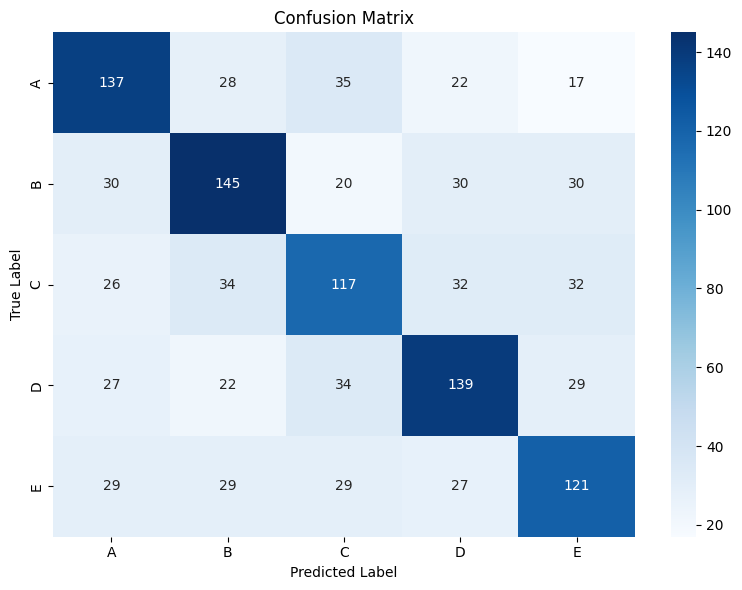

In [28]:
# Get the confusion matrix
cm = test_results_pretrained_model['confusion_matrix']

# Define class labels (A-E)
labels = ['A', 'B', 'C', 'D', 'E']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [33]:
config_bert = BertConfig.from_pretrained('bert-base-cased')
random_bert_model = BertForMultipleChoice(config_bert)

c:\Users\fabia\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [43]:
# best model in theory
best_random_model_path = "./checkpoints/sweep-t666b3vz-2025-05-15_00-57-35/best_random_transformer_model.pt"
random_bert_model.load_state_dict(torch.load(best_random_model_path))
random_bert_model.to(device)
random_bert_model.eval()
test_results_random_model = evaluate(random_bert_model, test_dataloader, device)

Evaluation: 100%|██████████| 77/77 [00:08<00:00,  9.25it/s]

Overall Accuracy: 0.1818
Per-class accuracy:
  Choice A: 0.1548
  Choice B: 0.1843
  Choice C: 0.1618
  Choice D: 0.2311
  Choice E: 0.1745


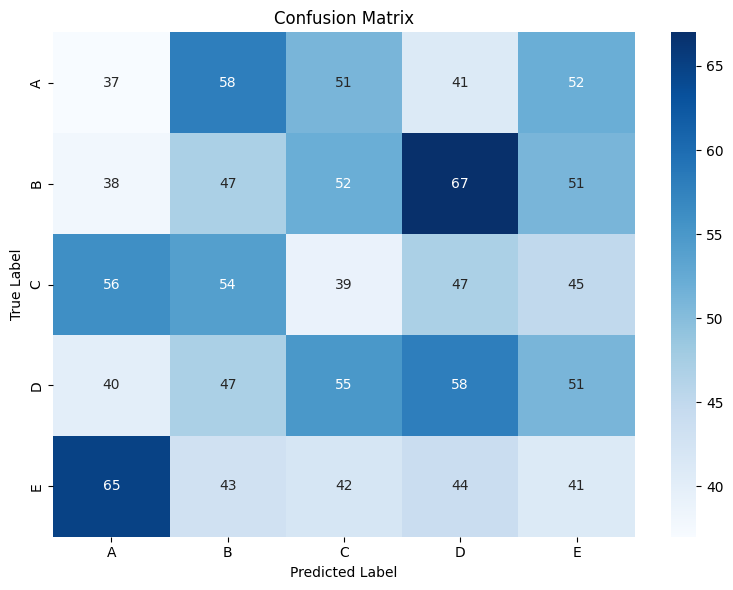

In [44]:
# Get the confusion matrix
cm = test_results_random_model['confusion_matrix']

# Define class labels (A-E)
labels = ['A', 'B', 'C', 'D', 'E']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [25]:
print(len(test))

1221


In [26]:
# For the validation set (1 example)
results = process_commonsense_qa_for_deepseek(test, deepseek_model, tokenizer_deepseek, num_examples=100)

NameError: name 'process_commonsense_qa_for_deepseek' is not defined

In [ ]:
print(results['questions'])
print(results['prompts'])
print(results['responses'])
print(results['correct_answers'])

In [ ]:
count = 0

for i in range(len(results['responses'])):
    if results['correct_answers'][i] == results['responses'][i]:
        count += 1
print(f"Accuracy: {count / len(results['responses']) * 100:.2f}%")

# **Interpretation**

# **Tools used**

### **Adjust this section before submitting**

1. **Programming Environment**
   - Python 3.12.8
   - Jupyter Notebook

2. **Machine Learning and Deep Learning**
   - PyTorch (neural network development)
   - Hugging Face Datasets (data management)
   - NLTK (natural language preprocessing)
   - FastText (pre-trained word embeddings, 300-dimensional vectors)

3. **Data Manipulation and Analysis**
   - NumPy (numerical computing)
   - Pandas (data structuring and manipulation)
   - Scikit-learn (potential additional machine learning utilities)

4. **Visualization and Tracking**
   - Matplotlib (basic plotting)
   - Seaborn (statistical data visualization)
   - Weights & Biases (experiment tracking and logging)
     * Tracked metrics: training loss, accuracy, learning rates
     * Logged hyperparameter configurations
     * Enabled comparative analysis across model runs

5. **Computational Infrastructure**
   - CUDA-enabled GPU acceleration
   - GPU-optimized PyTorch operations
   - Efficient parallel computing for model training

6. **Dataset and Benchmarking**
   - CommonsenseQA dataset (Hugging Face)
   - Standard benchmark for commonsense reasoning tasks

7. **Additional Libraries**
   - Gensim (word vector processing)
   - tqdm (progress bar visualization)
   - datetime (experiment timestamping)

8. **AI-Tools**
   - Claude 3.5 Sonnet: Utilized as a coding assistant for debugging, optimization and documentation.
   - GPT-4-turbo: Assisted in drafting and refining documentation, helping with structure and phrasing.
   - Copilot: Used for quick inserts, when recommendation was suitable for what I was planning to do.

9. **Sources**
   - Transformer architecture: https://medium.com/data-science/build-your-own-transformer-from-scratch-using-pytorch-84c850470dcb
   - Deepseek implementation: https://huggingface.co/deepseek-ai/DeepSeek-V2-Lite
   - Medium blog for warmup steps: https://medium.com/better-ml/the-art-of-setting-learning-rate-eff11ac0a737